This notebook can be run on mybinder: [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/git/https%3A%2F%2Fgricad-gitlab.univ-grenoble-alpes.fr%2Fchatelaf%2Fparcours-numerique-ia/master?filepath=notebooks%2F/8_NN_Perceptron_MLP/N3_MLPRegressor.ipynb)

## Multi-layer Perceptron for regression
The note book aims at illsutrating the behaviour of MLPRerressor for different solvers and activation function. 
It is left to the student to change the parameters and observe the output results. 

Consider the same example as in notebook N2_Regression_tree.ipynb

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

The number of point in the set is 629


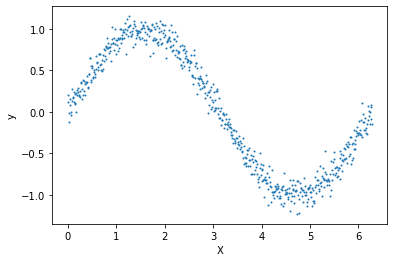

In [118]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

noise_std=.1
step=.01
X=np.arange(0,2*np.pi,step)[:,np.newaxis]
nx=np.random.randn(X.shape[0],1)*noise_std
y=np.sin(X)+np.random.randn(X.shape[0],1)*noise_std
print("The number of point in the set is {}".format(len(X)))

plt.figure()
plt.scatter(X,y,s=1)
plt.xlabel('X')
plt.ylabel('y');

The regressor contains 3 layers
Regression coefficient from input to first layer :
 [[0.10671916 2.81606654 0.67328464 0.47073776 0.41606276]]
regression coefficient from hidden layer to output node :
 [[ 0.65344204]
 [-0.16617102]
 [-1.94056061]
 [ 4.05287768]
 [ 4.53866458]]
output activation function is identity


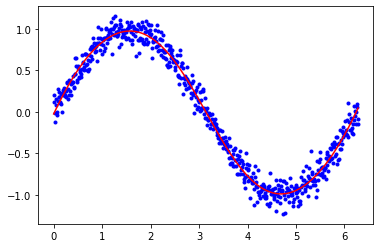

In [120]:
from sklearn.neural_network import MLPRegressor
N_neurons=5
reg=MLPRegressor(hidden_layer_sizes=(N_neurons),\
             activation='tanh',\
             solver='lbfgs', \
             alpha=0.001, \
             max_iter=2500, \
             shuffle=True ,\
             random_state=None )

reg.fit(X,y.ravel())
plt.plot(X,y,'.b')
plt.plot(X,reg.predict(X),'r')

print("The regressor contains {} layers".format((reg.n_layers_)))
print("Regression coefficient from input to first layer :\n {}".format(reg.coefs_[0]))
print("regression coefficient from hidden layer to output node :\n {}".format(reg.coefs_[1]))
print('output activation function is {}'.format(reg.out_activation_))

### 1. Using 'tanh' and 'lbfgs' as parameters :
- Change the parameter N_Neurons (from e.g.2 to 10) and observe the results
- How many coefficients must be identified for this regressor (as unction of N_Neurons)? (refer to the documentation of scikit-learn MLPRgeressor to understand the structure)
- Replace  "tanh" by "relu" or "identity": explain your observations

Remind that setting "hidden_layer_sizes=(N_neurons)" sets the number of nodes in the hidden layer to N_neurons. This regressor contains 3 layers (input, hidden, output)

### 2. Using 'sgd' solver
- Replace the quasi Newton (lbfgs) solver by a Stochastic Gradient descent (sgd) solver. Comment your observations
- Replace the parameter "step" by e.g. 001. and run the code for N_Neurons=10. Comment your observations.
- Replace the activation function by 'relu'. Comment.
- Set parameter hidden_layer_sizes to (N_Neurons,N_neurons) (2 identical size hidden layers) : how many coefficients need to be identified for this new regressor (in function of N_Neurons)? Set N_neurons to e.g. 25. (this may take some time to compute). Comment your findings
- Why does the parmaeters 'sgd' and 'relu' require more neurons in first layer and ar least to layers to give acceptable results?
